In [1]:
import math
import pickle

with open('chance_dict.pkl', 'rb') as f:
    order_chance_dict = pickle.load(f)

order_chance_dict

{577: {577: 0.23631123919308358,
  625: 0.0,
  630: 0.002881844380403458,
  774: 0.14697406340057637,
  909: 0.0,
  941: 0.0,
  958: 0.08645533141210375,
  1000: 0.005763688760806916,
  1002: 0.0,
  1031: 0.0,
  1141: 0.0,
  1261: 0.0,
  1270: 0.005763688760806916,
  1392: 0.0,
  1406: 0.0,
  1449: 0.0,
  1483: 0.0,
  1630: 0.002881844380403458,
  1688: 0.0,
  1711: 0.002881844380403458,
  1755: 0.002881844380403458,
  1778: 0.0,
  1789: 0.0,
  1819: 0.023054755043227664,
  1829: 0.0,
  1852: 0.0,
  1884: 0.0,
  1885: 0.005763688760806916,
  1888: 0.008645533141210375,
  1895: 0.0,
  2004: 0.020172910662824207,
  2018: 0.0,
  2022: 0.005763688760806916,
  2044: 0.008645533141210375,
  2073: 0.0,
  2246: 0.0,
  2325: 0.0,
  2340: 0.0,
  2389: 0.0,
  2560: 0.0,
  2598: 0.0,
  2605: 0.0,
  2620: 0.005763688760806916,
  2676: 0.002881844380403458,
  2778: 0.0,
  2796: 0.0,
  2853: 0.002881844380403458,
  3031: 0.0,
  3085: 0.005763688760806916,
  3121: 0.0,
  3242: 0.0,
  3267: 0.008645533

In [2]:
with open('tray_chance_dict.pkl', 'rb') as f:
    tray_chance_dict = pickle.load(f)

tray_chance_dict

{577: {577: 0.1248097412480974,
  625: 0.0030441400304414,
  630: 0.0121765601217656,
  774: 0.0791476407914764,
  909: 0.0015220700152207,
  941: 0.0076103500761035,
  958: 0.0502283105022831,
  1000: 0.0060882800608828,
  1002: 0.0030441400304414,
  1031: 0.0030441400304414,
  1141: 0.0,
  1261: 0.0045662100456621,
  1270: 0.0060882800608828,
  1392: 0.0015220700152207,
  1406: 0.0015220700152207,
  1449: 0.0030441400304414,
  1483: 0.0015220700152207,
  1630: 0.0060882800608828,
  1688: 0.0060882800608828,
  1711: 0.0076103500761035,
  1755: 0.0091324200913242,
  1778: 0.0060882800608828,
  1789: 0.0045662100456621,
  1819: 0.0136986301369863,
  1829: 0.0015220700152207,
  1852: 0.0030441400304414,
  1884: 0.0045662100456621,
  1885: 0.0091324200913242,
  1888: 0.0121765601217656,
  1895: 0.0030441400304414,
  2004: 0.0106544901065449,
  2018: 0.0030441400304414,
  2022: 0.0076103500761035,
  2044: 0.0030441400304414,
  2073: 0.0060882800608828,
  2246: 0.0076103500761035,
  2325: 0

In [3]:
from typing import Dict
import math
def calculate_avg_entropy(matrix: Dict[int, Dict[int, float]]):
    eps = 1e-12
    total_entropy = 0
    for row_key in matrix:
        row = matrix[row_key]
        entropy_row = 0
        value_check = 0
        for col_key in row:
            value = row[col_key]
            value_check += value
            entropy_row -= value * math.log2(value + eps)
        #print(value_check)
        total_entropy += entropy_row
    total_entropy /= len(matrix.keys())
    return total_entropy

def calculate_entropy_entries(matrix: Dict[int, Dict[int, float]]):
    eps = 1e-12
    entries = []
    for row_key in matrix:
        row = matrix[row_key]
        entropy_row = 0
        value_check = 0
        for col_key in row:
            value = row[col_key]
            value_check += value
            entropy_row -= value * math.log2(value + eps)
        #print(value_check)
        entries.append(entropy_row)
    return entries

In [4]:
calculate_avg_entropy(order_chance_dict)


3.4322469319257793

In [5]:
calculate_avg_entropy(tray_chance_dict)

5.781442079537959

In [6]:
from matplotlib import pyplot as plt
tray_hist_values = calculate_entropy_entries(tray_chance_dict)
order_hist_values = calculate_entropy_entries(order_chance_dict)


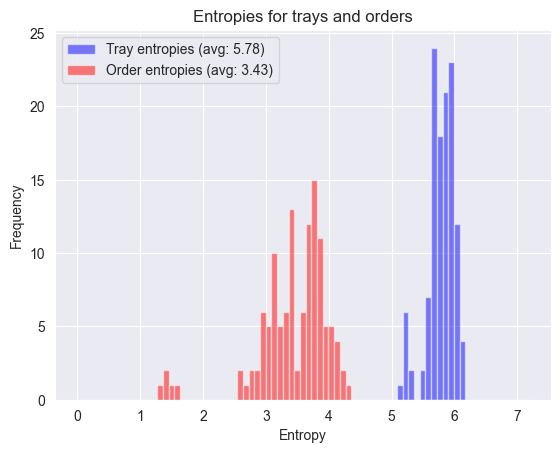

In [9]:
import numpy as np
bins = np.linspace(0, max(max(tray_hist_values), max(order_hist_values)) + 1, 80)
tray_counts, _ = np.histogram(tray_hist_values, bins=bins)
order_counts, _ = np.histogram(order_hist_values, bins=bins)


bin_width = bins[1] - bins[0]
bin_centers = bins[:-1] + bin_width / 2

plt.bar(bin_centers, tray_counts, width=bin_width, color="blue", alpha=0.5, label=f"Tray entropies (avg: {calculate_avg_entropy(tray_chance_dict):.2f})")
plt.bar(bin_centers, order_counts, width=bin_width, color="red", alpha=0.5, label=f"Order entropies (avg: {calculate_avg_entropy(order_chance_dict):.2f})")
# Plot histograms
#plt.hist(tray_hist_values, bins=30, color='blue', alpha=0.5, label='Tray entropies')
#plt.hist(order_hist_values, bins=30, color='red', alpha=0.5, label='Order entropies')

# Add legend and labels
plt.legend()
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.title('Entropies for trays and orders')

# Show plot
plt.show()